In [ ]:
%matplotlib inline




============================
Underfitting vs. Overfitting
============================

This example demonstrates Ridge regression (Tikhonov Regularization)


Automatically created module for IPython interactive environment
[0.e+00 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


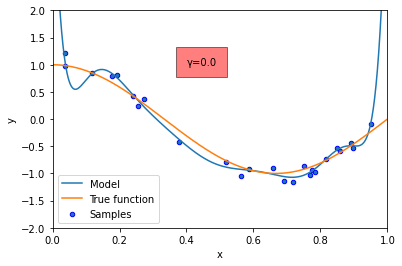

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.74514e-17): result may not be accurate.
  overwrite_a=True).T


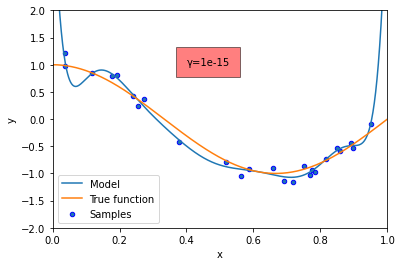

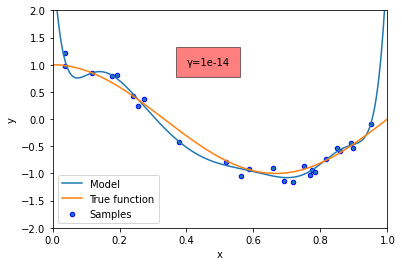

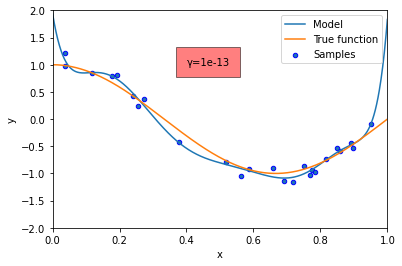

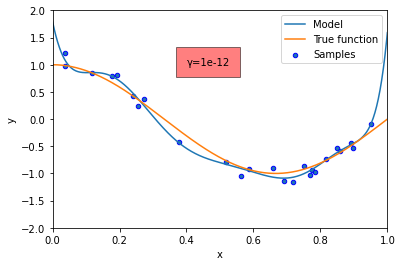

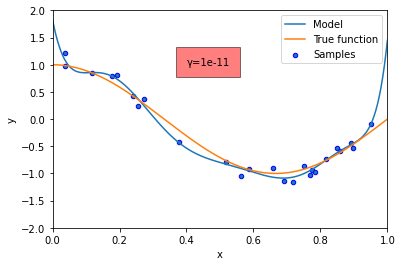

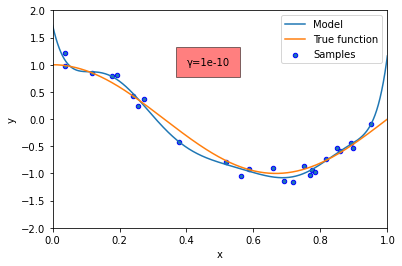

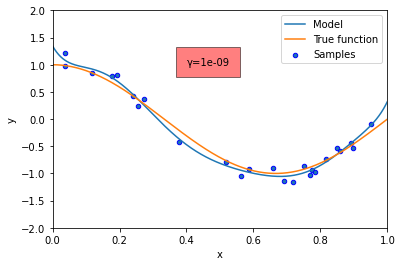

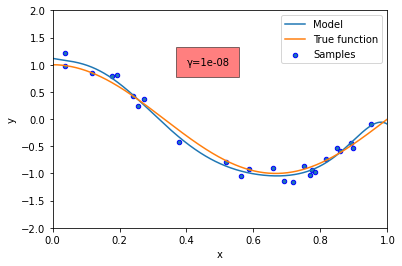

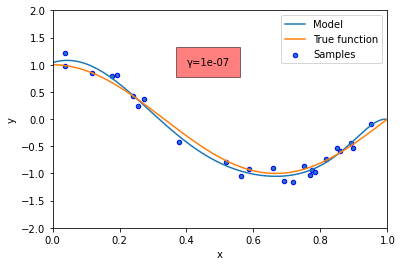

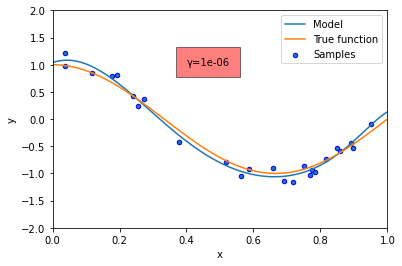

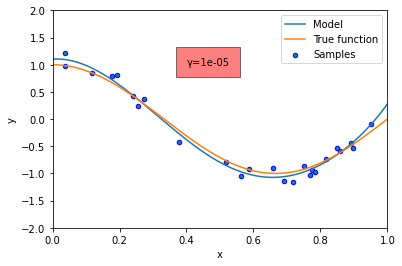

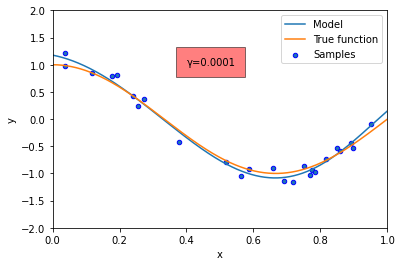

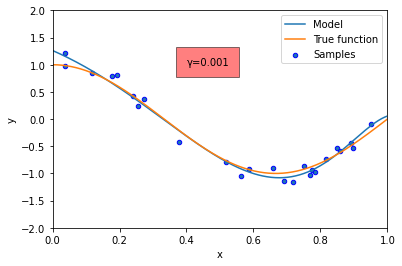

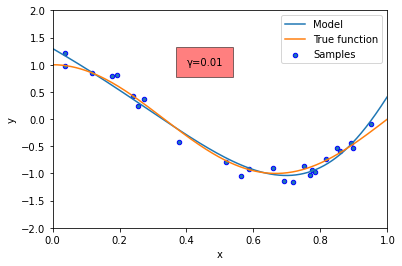

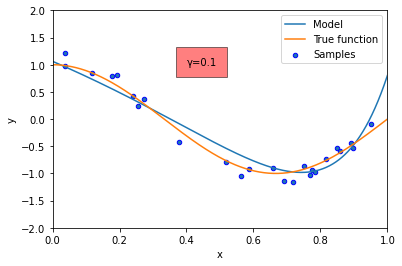

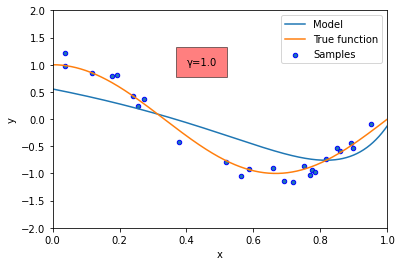

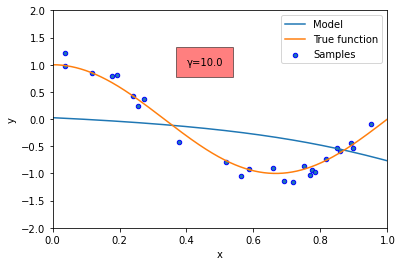

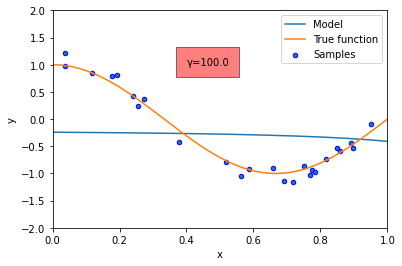

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(20)
n_samples = 25
sig = 0.1; # noise level

alphas = np.append([0],np.logspace(-15, 2, 18)) # list([0, 0.001,0.01, 0.03, 0.1, 1])
print(alphas)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
t = np.zeros(len(alphas))
#cv = np.zeros(len(alphas))
i=0
#scores=0
for alfa in alphas:
    polynomial_features = PolynomialFeatures(degree=10,
                                             include_bias=True)
    #linear_regression = LinearRegression()
    ridge = Ridge(alpha=alfa)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge", ridge)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # Compare the model with the truth
    X_test = np.linspace(0, 1, 1000)
    y1 = pipeline.predict(X_test[:, np.newaxis])
    y2 = true_fun(X_test)
    t[i]= np.mean(np.square(y1-y2)) + sig**2
    #print(t[i])

    plt.plot(X_test, y1 , label="Model")
    plt.plot(X_test, y2, label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.text(0.4, 1,chr(947)+ '='    +str(alfa), 
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    fig = plt.gcf()
    plt.show()
    #fig.savefig('plot' + str(i+1) +  'ridge.pdf',format='pdf')
    i = i+1

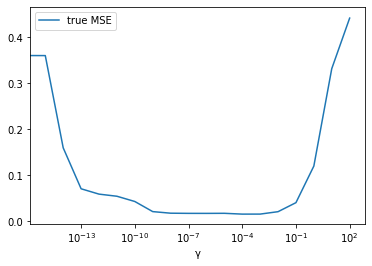

In [ ]:
plt.plot(alphas,t,label="true MSE")  
plt.legend(loc="best")
plt.xscale("log")
fig2 = plt.gcf()
plt.xlabel(chr(947))
plt.show()
